In [1]:
import numpy as np
import pandas as pd
import random

In [10]:
n_trials = nrows = 1_000_000
n_dice = ncols = 4
rolls = np.random.choice([1,2,3,4,5,6], n_trials * n_dice).reshape(nrows, ncols)
rolls = pd.DataFrame(rolls, columns={0,1,2,'lucky_number'})
rolls


0  1  2  lucky_number
0       3  5  5             5
1       4  5  4             3
2       6  1  2             5
3       1  5  5             2
4       4  5  4             5
...    .. .. ..           ...
999995  6  6  1             5
999996  6  4  1             6
999997  1  4  4             4
999998  1  4  5             5
999999  3  5  2             6

[1000000 rows x 4 columns]

In [11]:
rolls['match_0'] = rolls[0]==rolls['lucky_number']
rolls['match_1'] = rolls[1]==rolls['lucky_number']
rolls['match_2'] = rolls[2]==rolls['lucky_number']


rolls.sample(10)

0  1  2  lucky_number  match_0  match_1  match_2
331492  6  5  2             3    False    False    False
98863   3  6  4             6    False     True    False
802389  4  6  3             3    False    False     True
192333  1  5  2             5    False     True    False
952333  6  3  3             3    False     True     True
376815  2  5  5             3    False    False    False
411069  6  6  5             4    False    False    False
67672   4  6  4             4     True    False     True
458477  4  5  1             2    False    False    False
78528   6  4  1             3    False    False    False

In [29]:
rolls['matches'] = rolls.select_dtypes(include=['bool']).sum(axis=1).astype(int)
rolls['matches'].convert_dtypes(int)
rolls['winnings'] = rolls.matches - 1
rolls.head(20)

0  1  2  lucky_number  match_0  match_1  match_2  matches  winnings
0   3  5  5             5    False     True     True        2         1
1   4  5  4             3    False    False    False        0        -1
2   6  1  2             5    False    False    False        0        -1
3   1  5  5             2    False    False    False        0        -1
4   4  5  4             5    False     True    False        1         0
5   3  5  3             5    False     True    False        1         0
6   5  5  6             4    False    False    False        0        -1
7   3  5  3             5    False     True    False        1         0
8   3  6  1             1    False    False     True        1         0
9   2  2  3             4    False    False    False        0        -1
10  5  3  4             2    False    False    False        0        -1
11  4  6  5             1    False    False    False        0        -1
12  4  2  3             3    False    False     True        1         0
13  5  1  1             6    False    False    False        0        -1
14  4  3  2             1    False    False    False        0        -1
15  6  1  6             4    False    False    False        0        -1
16  3  4  4             2    False    False    False        0        -1
17  1  4  3             5    False    False    False        0        -1
18  6  3  1             6     True    False    False        1         0
19  5  2  3             5     True    False    False        1         0

In [30]:
rolls.matches.value_counts()

0    578305
1    347793
2     69212
3      4690
Name: matches, dtype: int64

### What are your chances of getting an outcome payout of $2? (where we earned 3 on the 1 ante)

In [31]:
(rolls.matches == 3.0).mean()

0.00469

### What are your chances of getting an payout of $1?

In [32]:
(rolls.matches == 2).mean()

0.069212

### What are your chances of getting a payout of 0 (where you ante 1 and win $1)?

In [33]:
(rolls.matches == 1).mean()

0.347793

### What are your chances of getting a payout of -$1 where you ante up, but don't win anything?

In [34]:
(rolls.matches == 0).mean()

0.578305

### What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)

In [19]:
cost_per_game = (rolls.matches == 3).mean() * 2 + (rolls.matches == 2).mean() - (rolls.matches == 0).mean()

cost_per_game

-0.49971299999999996

### Chart out a histogram of all the outcomes of those 1,000,000 games

<AxesSubplot:>

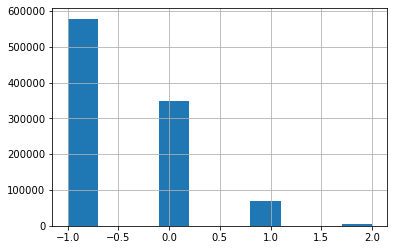

In [35]:
rolls.winnings.hist()

### Is this really a fair game of 1/6 + 1/6 + 1/6 odds?

In [ ]:
#your overall chance of winning anything at all is less than 43%

### If you play 1,000,000 games in a row, what are your winnings/losses?

In [28]:
round(cost_per_game * 1_000_000,2)

-499713.0